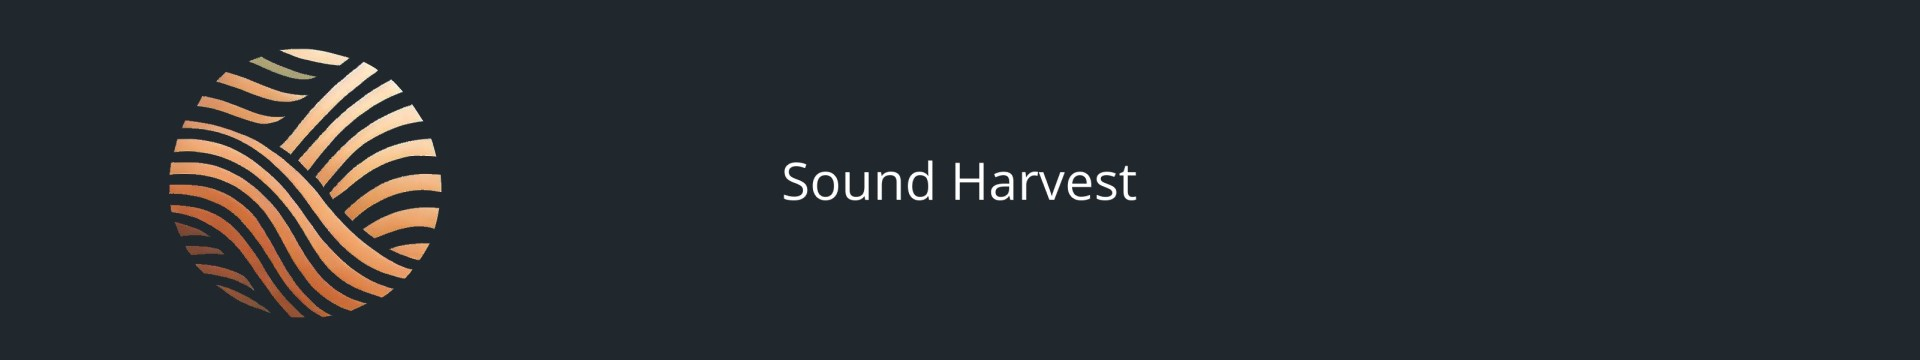

# Welcome to Sound Harvet
Sound Harvest is a user-friendly YoutTube to mp3 converter. Simply paste a YouTube url into the video_url field and hit play and in less than a minute you'll have an mp3 file located in your Colab's Files directory (🖿) located to the left for you to download to your local drive.

In [ ]:
video_url = "https://www.youtube.com/watch?v=tlqC-XpxGBE" #@param {type:"string"}

try:
    import yt_dlp as youtube_dl
except ModuleNotFoundError:
    !pip install yt-dlp
    import yt_dlp as youtube_dl

def download_audio(url):
    options = {
        'format': 'bestaudio/best',
        'extractaudio': True,
        'audioformat': 'mp3',
        'outtmpl': '%(title)s-%(id)s.%(ext)s',
        'nocheckcertificate': True,
    }

    with youtube_dl.YoutubeDL(options) as ydl:
        info_dict = ydl.extract_info(url, download=True)
        audio_file = ydl.prepare_filename(info_dict)

    print(f"Audio downloaded as: {audio_file}")

    # Convert the downloaded audio to mp3 format
    mp3_file = audio_file.replace('.webm', '.mp3')
    import subprocess
    subprocess.run(['ffmpeg', '-i', audio_file, mp3_file])
    print(f"Audio saved as: {mp3_file}")

    # Remove the original webm file
    import os
    os.remove(audio_file)

download_audio(video_url)